In [19]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesRegressor

In [20]:
#importing dataset
df = pd.read_csv(r'car data.csv')

In [21]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df.shape

(301, 9)

In [23]:
#checking the unique values of the categorical features
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [24]:
#checking for missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
main_data  = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [28]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
main_data['Current_year'] = 2022

In [30]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [31]:
main_data['Car_age'] = main_data['Current_year'] - main_data['Year']

In [32]:
main_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [33]:
main_data.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [34]:
main_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [35]:
main_data = pd.get_dummies(main_data, drop_first=True)
main_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [36]:
main_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


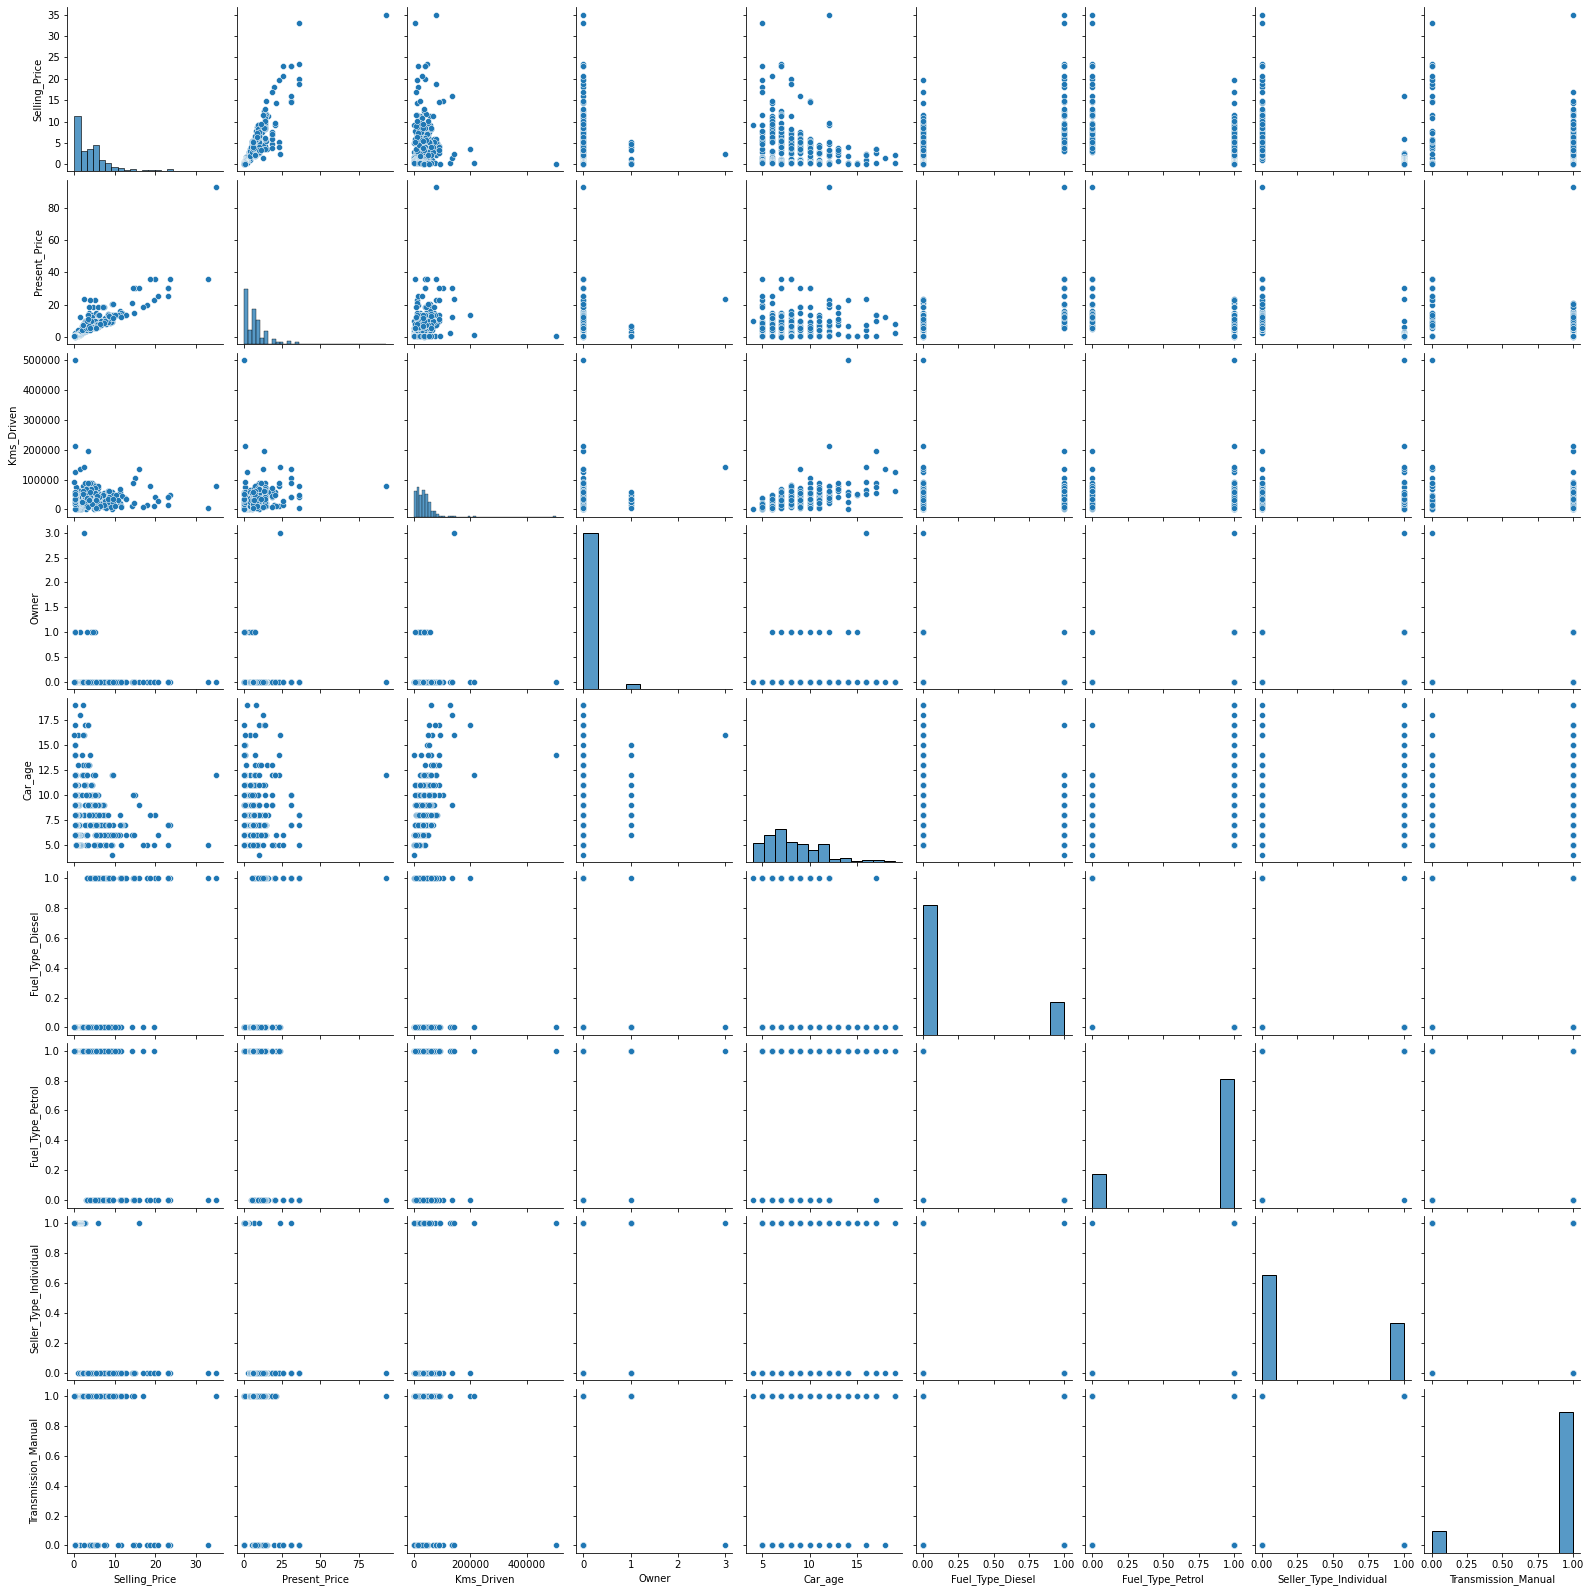

In [37]:
sns.pairplot(main_data)

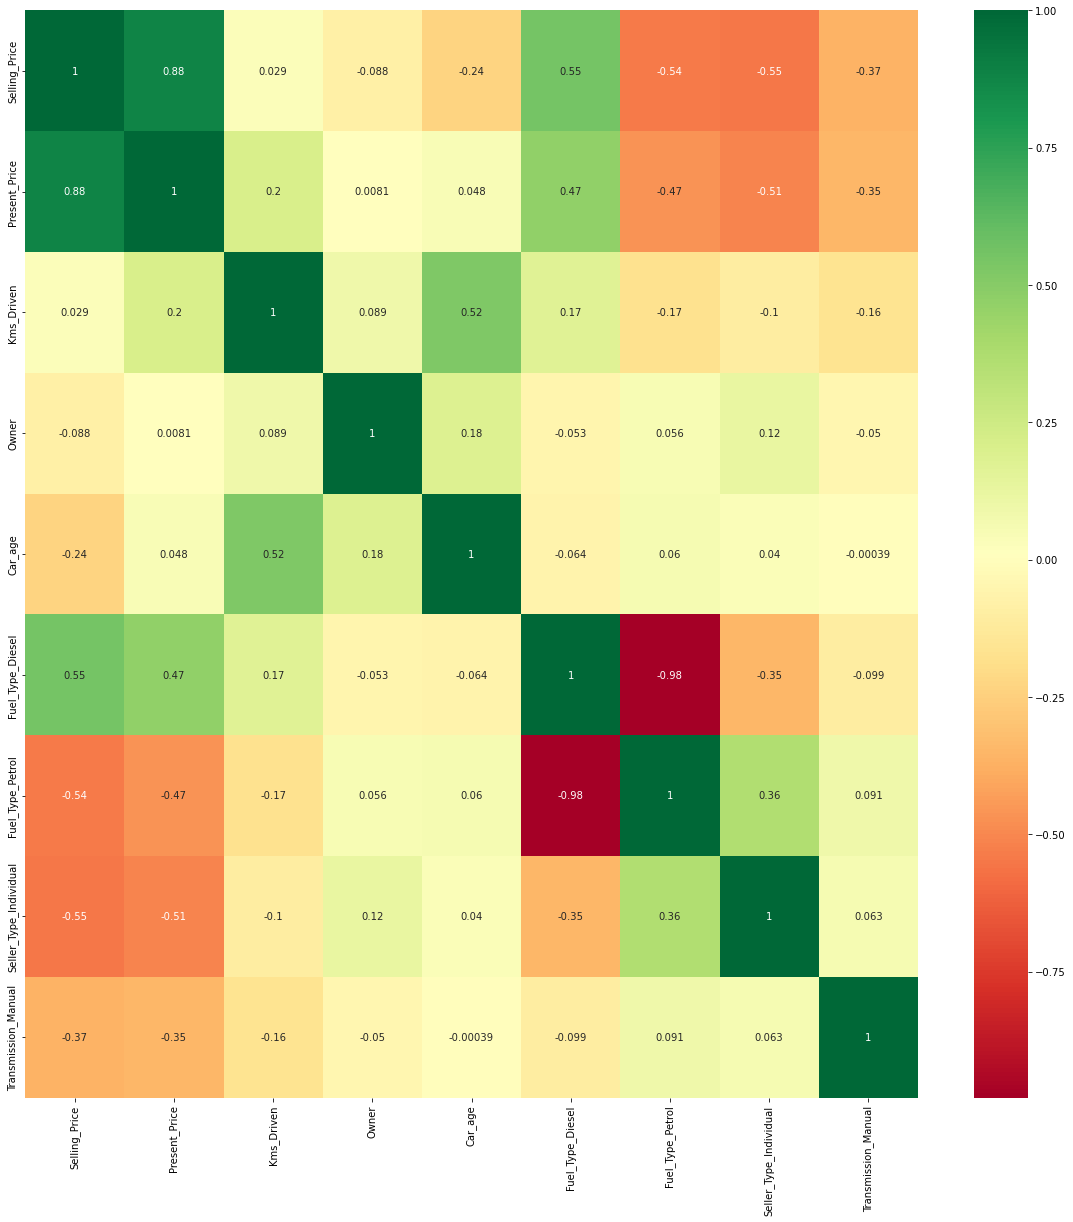

In [38]:
corrmatrix = main_data.corr()
top_features = corrmatrix.index
plt.figure(figsize=(20,20))
g = sns.heatmap(main_data[top_features].corr(), annot=True,cmap="RdYlGn")

In [39]:
X = main_data.iloc[:, 1:]
y = main_data.iloc[:, 0]

In [40]:
model = ExtraTreesRegressor()
print(model.fit(X,y))

ExtraTreesRegressor()


In [41]:
print(model.feature_importances_)

[3.77808785e-01 4.27330393e-02 3.70366913e-04 7.41970631e-02
 2.32445651e-01 1.16544460e-02 1.24684040e-01 1.36106608e-01]


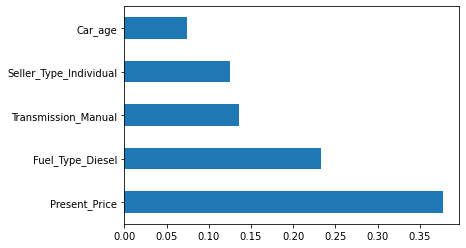

In [42]:
feature_imps = pd.Series(model.feature_importances_, index=X.columns)
feature_imps.nlargest(5).plot(kind='barh')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.shape

(240, 8)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [46]:
#hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
#randomized search CV

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 12)]

#max_depth.append(None)
#minimum number of samples reqired to split split a node
min_samples_split = [2, 5, 10, 15, 100]

#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 20]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
# Create the random grid

random_grid = {
    'n_estimators': n_estimators,  
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 20]}


In [51]:
rf = RandomForestRegressor()

In [52]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs=1, verbose=1)

In [53]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [54]:
predictions = rf_random.predict(X_test)

In [55]:
predictions

array([ 2.66154699,  7.83269375,  3.18362099,  6.84274007,  4.41328608,
        4.24985547,  2.77791428,  6.90450901,  8.05687606,  4.94612509,
        2.74781031,  0.62564997,  0.4072857 ,  3.44831481,  1.16475654,
        2.97457409, 10.49635683,  0.41556309,  4.31179758,  7.49906551,
        0.2383534 ,  4.67021219,  8.19266115,  5.50570203,  0.47472616,
        3.49504432,  2.7865105 ,  0.69228046,  1.18864526,  5.51322413,
        0.37497606, 22.41285534,  1.16433252,  0.3917527 ,  0.41338759,
        3.36470744,  1.19441743,  0.25473971,  3.15257432,  5.07824008,
       22.40081854, 22.64079625,  7.70154299,  5.14995733,  4.42965285,
        0.41880796,  6.35573911,  0.85594417,  2.97599267,  4.02958735,
        0.41913121,  2.50444459,  0.27592339, 13.9533673 ,  0.30067886,
        6.15685777,  4.70424748,  4.35514367,  8.79816492,  7.35057357,
        0.41651051])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

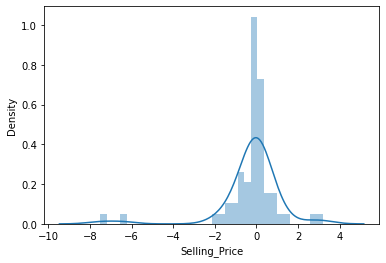

In [57]:
sns.distplot(y_test - predictions)

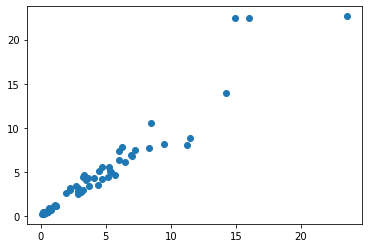

In [56]:
plt.scatter(y_test, predictions)

In [58]:
import pickle
file = open('cp_model.pkl', 'wb')
pickle.dump(rf_random, file)